# 💹Financial Analysis of Indian Bank💰

## 🔧Preparing the tools

In [5]:
# Import all the tools

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Datareader and datetime module
from pandas_datareader import data, wb
import datetime

## 📜Collecting Data

In [6]:
start_date = datetime.datetime(2006, 1, 1)             # From 2006
end_date = datetime.datetime(2020, 12, 31)             # To the end of 2020

**Data**

*NSE = National Stock Exchange of India*

*Bank Name = Bank's NSE Code*
1. State Bank of India = 'SBIN.NS'      
2. HDFC Bank = 'HDFCBANK.NS'
3. Axis Bank = 'AXISBANK.NS'
4. Kotak Mahindra Bank = 'KOTAKBANK.NS'
5. Bank of Baroda = 'BANKBARODA.NS'
6. Punjab National Bank = 'PNB.NS'
7. ICICI Bank = 'ICICIBANK.NS'
8. YES Bank = 'YESBANK.NS'

### Creating DataFrames

In [7]:
SBI = data.DataReader("SBIN.NS", data_source='yahoo', start=start_date, end=end_date)
HDFC = data.DataReader("HDFCBANK.NS", data_source='yahoo', start=start_date, end=end_date)
AXIS = data.DataReader("AXISBANK.NS", data_source='yahoo', start=start_date, end=end_date)
BOB = data.DataReader("BANKBARODA.NS", data_source='yahoo', start=start_date, end=end_date)
PNB = data.DataReader("PNB.NS", data_source='yahoo', start=start_date, end=end_date)
ICICI = data.DataReader("ICICIBANK.NS", data_source='yahoo', start=start_date, end=end_date)
YESBANK = data.DataReader("YESBANK.NS", data_source='yahoo', start=start_date, end=end_date)
KOTAK = data.DataReader("KOTAKBANK.NS", data_source='yahoo', start=start_date, end=end_date)

#### List of the ticker symbols (as strings) in alphabetical order

In [8]:
tickers = 'SBI HDFCBANK AXISBANK BANKBARODA PNB ICICIBANK YESBANK KOTAKBANK'.split()
tickers.sort()
tickers

['AXISBANK',
 'BANKBARODA',
 'HDFCBANK',
 'ICICIBANK',
 'KOTAKBANK',
 'PNB',
 'SBI',
 'YESBANK']

### Create a Single DataFrame by Concatenating all the above DataFrames

In [9]:
bank_stocks = pd.concat([AXIS, BOB, HDFC, ICICI, KOTAK, PNB, SBI, YESBANK], axis=1, keys=tickers)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker   AXISBANK                                                         \
Stock Info        High        Low       Open      Close     Volume  Adj Close   
Date                                                                            
2006-01-02   58.700001  57.299999  58.400002  57.660000   715590.0  50.620422   
2006-01-03   58.759998  57.700001  58.040001  57.919998   419965.0  50.848679   
2006-01-04   59.750000  58.200001  58.599998  59.299999  1448085.0  52.060192   
2006-01-05   61.099998  58.810001  59.299999  60.740002  3013255.0  53.324390   
2006-01-06   63.099998  60.820000  61.799999  62.770000  2035155.0  55.106552   

Bank Ticker BANKBARODA                                   ...        SBI  \
Stock Info        High        Low       Open      Close  ...       Open   
Date                                                     ...              
2006-01-02   48.900002  48.020000  48.310001  48.380001  ...  86.096275   
2006-01-03   49.700001  48.400002  48.599998  49.139999  ...  85.681129   
2006-01-04   52.180000  50.000000  50.000000  51.470001  ...  86.398201   
2006-01-05   52.759998  51.480000  51.759998  52.290001  ...  86.954880   
2006-01-06   52.900002  51.599998  52.400002  51.990002  ...  88.785309   

Bank Ticker                                   YESBANK                       \
Stock Info       Close      Volume  Adj Close    High    Low   Open  Close   
Date                                                                         
2006-01-02   85.379204  21240601.0  71.779953   13.90  13.64  13.80  13.67   
2006-01-03   86.053818  17462401.0  72.347115   14.24  13.70  13.72  13.90   
2006-01-04   86.605782  19420938.0  72.811165   14.00  13.70  13.99  13.79   
2006-01-05   88.813614  42574671.0  74.667328   14.68  13.75  13.98  14.32   
2006-01-06   88.705109  23846595.0  74.576111   14.53  13.95  14.30  14.29   

Bank Ticker                        
Stock Info      Volume  Adj Close  
Date                               
2006-01-02    401370.0  12.185697  
2006-01-03   1711690.0  12.390721  
2006-01-04    771330.0  12.292665  
2006-01-05   8755585.0  12.765118  
2006-01-06   3368195.0  12.738376  

[5 rows x 48 columns]

# 🔎Data Exploration (Exploratory Data Analysis - EDA)

* Closing price: the price at which market closed at 3.30pm in India.
* Adjusted Closing prices: the average of the price from 3 to 3.30pm (last half an hour prices).

For all profit loss calculations at the end of the day Adjusted Close price is used and not Closing Price.

### Maximum Adjusted Close Price for each Bank's Stock

In [12]:
bank_stocks.xs(key='Adj Close', axis=1, level='Stock Info').max()

Bank Ticker
AXISBANK       821.779419
BANKBARODA     218.947388
HDFCBANK      1441.800049
ICICIBANK      549.400024
KOTAKBANK     2017.949951
PNB            243.925964
SBI            372.399994
YESBANK        383.467163
dtype: float64

## A New DataFrame called returns
This dataframe will contain the returns for each bank's stock. returns are typically defined by:*

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

$where:$
    $$r_t = returnAtDate$$
    $$p_t = priceAtDate$$
    $$p_{t-1} = priceAtPreviousDate$$

In [13]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Adj Close'].pct_change()

Pandas **dataframe.pct_change()** function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [14]:
returns.head()

,AXISBANK Return,BANKBARODA Return,HDFCBANK Return,ICICIBANK Return,KOTAKBANK Return,PNB Return,SBI Return,YESBANK Return
Date,,,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.004509,0.015709,-0.000210,0.015913,0.043092,0.002966,0.007901,0.016825
2006-01-04,0.023826,0.047416,0.026286,0.011871,0.016610,0.023236,0.006414,-0.007914
2006-01-05,0.024283,0.015932,0.010177,-0.014909,0.026603,0.020335,0.025493,0.038434
2006-01-06,0.033421,-0.005737,0.039824,-0.007278,-0.021220,-0.010116,-0.001222,-0.002095


## Pair Plot of the 'returns' DataFrame

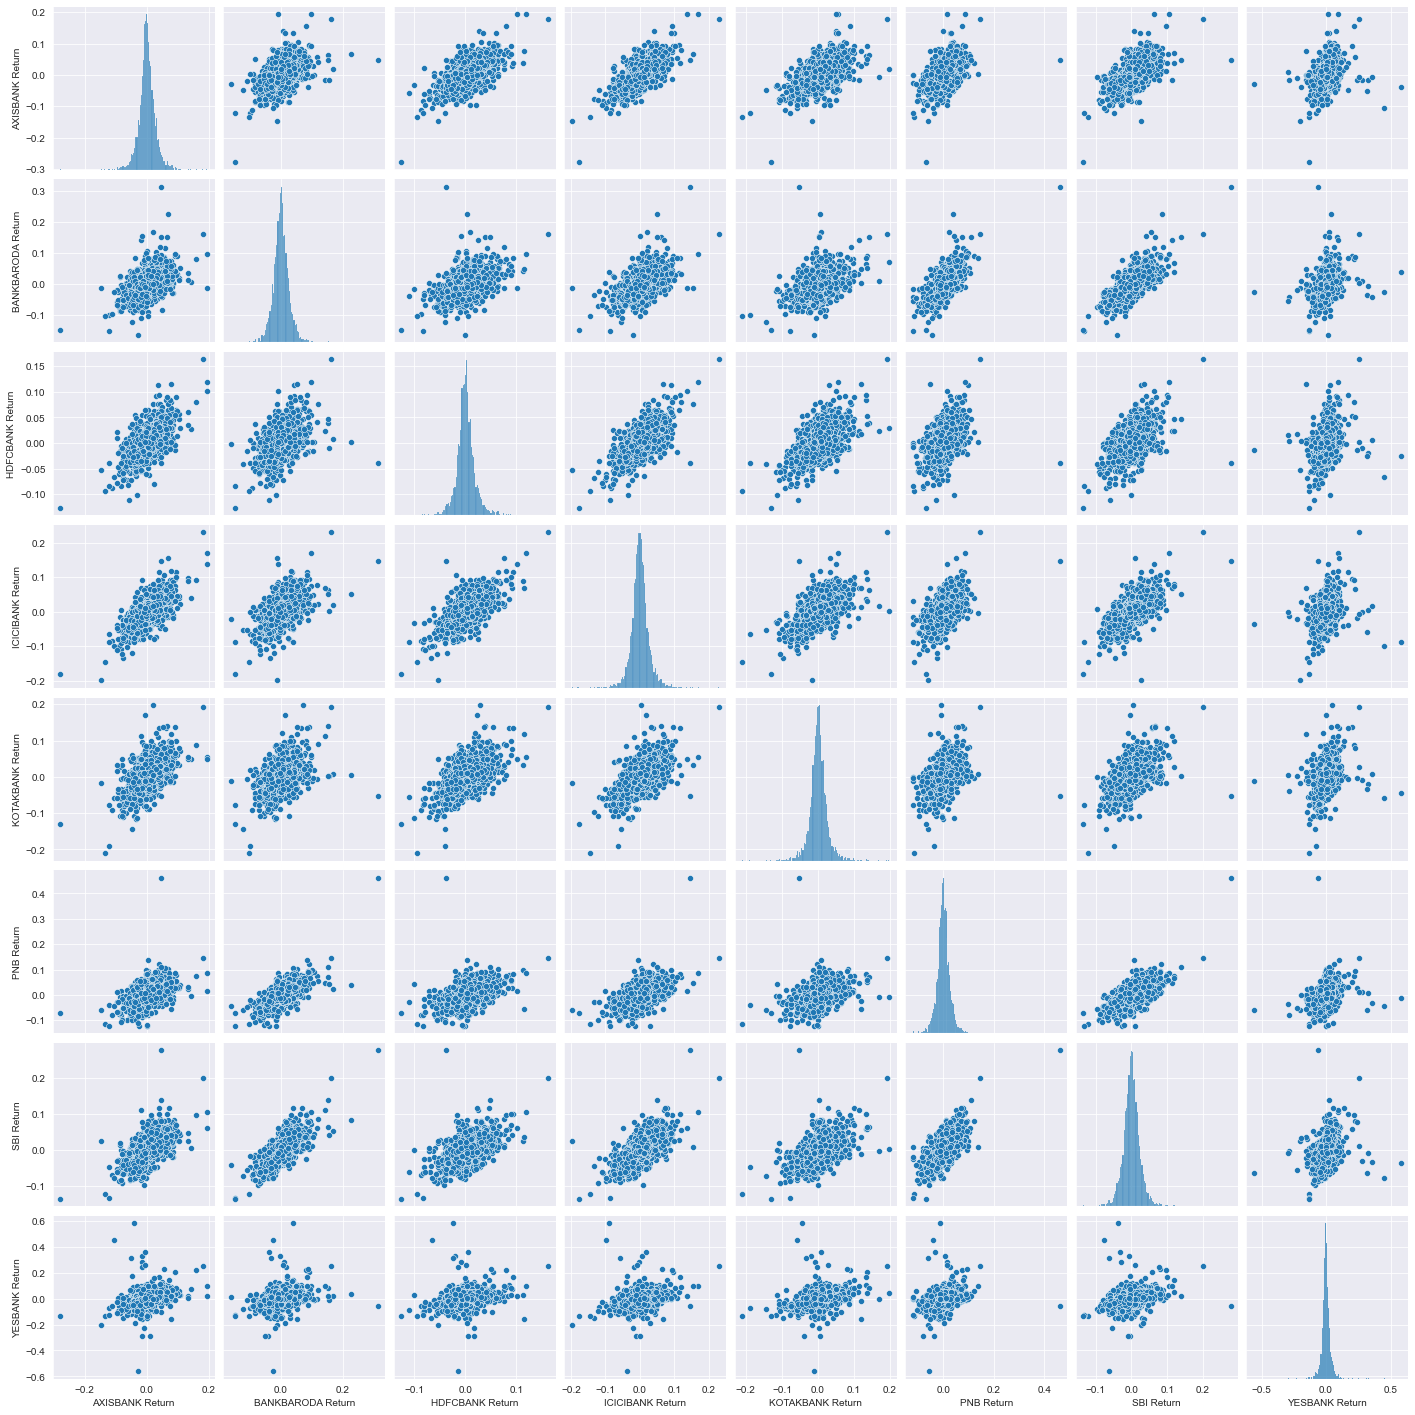

In [15]:
sns.pairplot(returns[1:])

## The Best and The Worst Single Day Returns

### Worst Returns

In [16]:
returns.idxmin()

AXISBANK Return     2020-03-23
BANKBARODA Return   2018-09-18
HDFCBANK Return     2020-03-23
ICICIBANK Return    2008-10-10
KOTAKBANK Return    2008-10-24
PNB Return          2020-03-12
SBI Return          2020-03-23
YESBANK Return      2020-03-06
dtype: datetime64[ns]

From the above data, it can be seen that 'March 2020' have the worst returns for most of the banks.
Reason behind this is the [2020 Stock Market Crash also known as Coronavirus Crash](https://en.wikipedia.org/wiki/2020_stock_market_crash).

It can also be observed that 'October 2008' also have the worst returns for some banks.
Reason behind this is the [2008 financial crisis](https://www.history.com/news/2008-financial-crisis-causes).

### Best Returns

In [17]:
returns.idxmax()

AXISBANK Return     2020-04-07
BANKBARODA Return   2017-10-25
HDFCBANK Return     2009-05-18
ICICIBANK Return    2009-05-18
KOTAKBANK Return    2006-06-09
PNB Return          2017-10-25
SBI Return          2017-10-25
YESBANK Return      2020-03-17
dtype: datetime64[ns]

## The Standard Deviation of the Returns

### For The Entire Time Period

In [18]:
returns.std()

AXISBANK Return      0.026930
BANKBARODA Return    0.027367
HDFCBANK Return      0.018968
ICICIBANK Return     0.026236
KOTAKBANK Return     0.025478
PNB Return           0.026865
SBI Return           0.024089
YESBANK Return       0.038275
dtype: float64

Yes Bank stocks would be classified as to be the riskiest over the entire time period.

### For 2019

In [19]:
returns.loc['2019-01-01':'2020-01-01'].std()

AXISBANK Return      0.016794
BANKBARODA Return    0.024989
HDFCBANK Return      0.012433
ICICIBANK Return     0.017849
KOTAKBANK Return     0.013811
PNB Return           0.025545
SBI Return           0.021790
YESBANK Return       0.061858
dtype: float64

### For 2008

In [20]:
returns.loc['2008-01-01':'2009-01-01'].std()

AXISBANK Return      0.045513
BANKBARODA Return    0.038360
HDFCBANK Return      0.036138
ICICIBANK Return     0.049224
KOTAKBANK Return     0.049702
PNB Return           0.034079
SBI Return           0.036360
YESBANK Return       0.049508
dtype: float64

## Dist Plot of the 2008 returns for State Bank of India

In [21]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='SBI Return', ylabel='Count'>

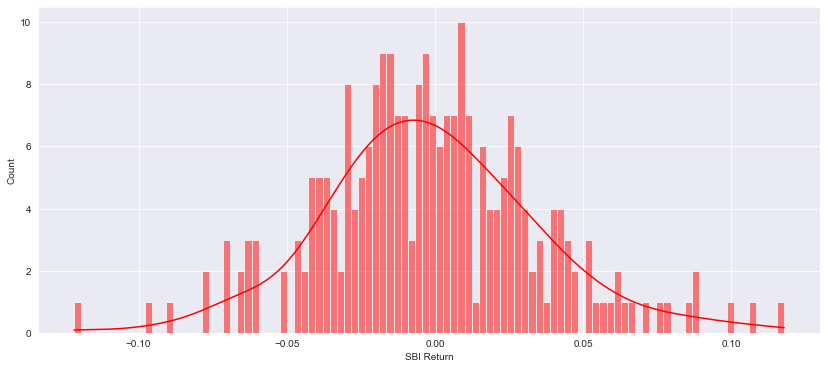

In [22]:
plt.figure(figsize=(14,6))
sns.histplot(returns['2008-01-01':'2009-01-01']['SBI Return'], color='red', bins=100, kde=True)

## Dist Plot of the 2015 returns for YES Bank

<AxesSubplot:xlabel='YESBANK Return', ylabel='Count'>

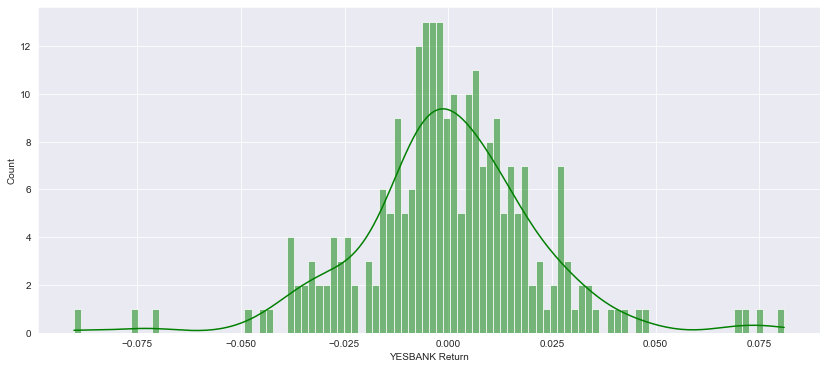

In [23]:
plt.figure(figsize=(14,6))
sns.histplot(returns['2015-01-01':'2016-01-01']['YESBANK Return'], color='green', bins=100, kde=True)

## Dist Plot of the 2009 returns for YES Bank

<AxesSubplot:xlabel='YESBANK Return', ylabel='Count'>

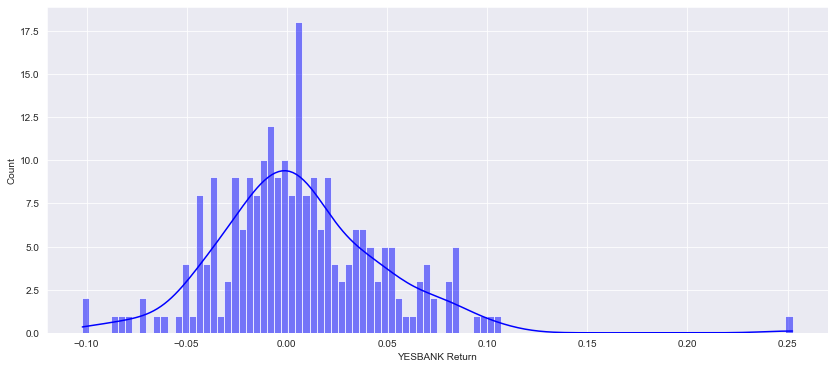

In [24]:
plt.figure(figsize=(14,6))
sns.histplot(returns['2009-01-01':'2010-01-01']['YESBANK Return'], color='blue', bins=100, kde=True)

# More Visualization

### Line Plot showing Close Price for each bank for the entire index of time

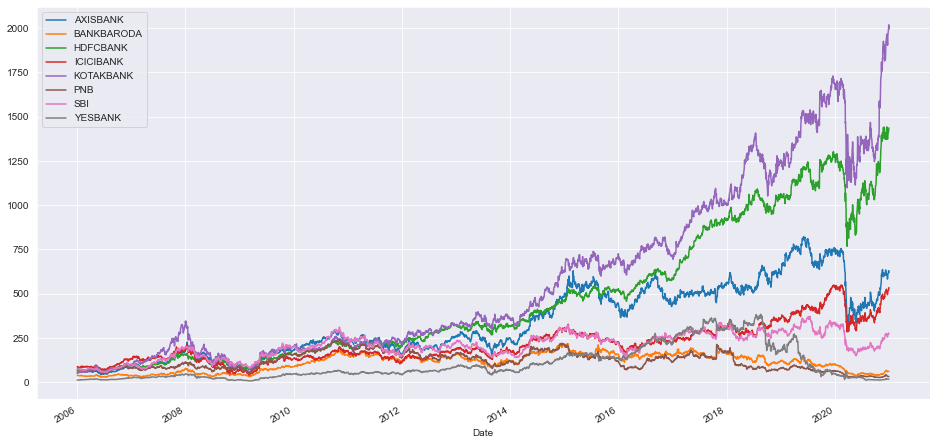

In [25]:
for tick in tickers:
    bank_stocks[tick]['Adj Close'].plot(label=tick, figsize=(16,8))
plt.legend()

# OR
# bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(16,8))

### Line Plot to compare Kotak Mahindra Bank with YES Bank

#### Best vs. Worst

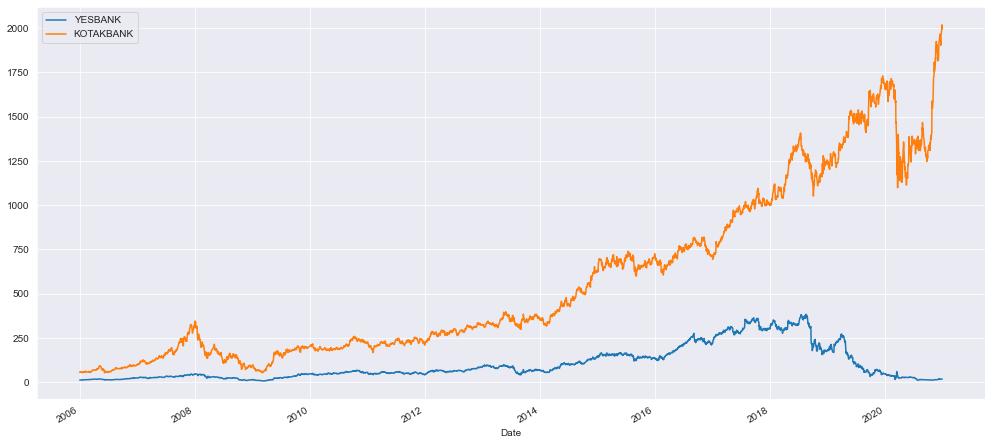

In [26]:
bank_stocks['YESBANK']['Adj Close'].plot(label='YESBANK', figsize=(17,8))
bank_stocks['KOTAKBANK']['Adj Close'].plot(label='KOTAKBANK', figsize=(17,8))
plt.legend(loc = 0)

## 180 Days Moving Average Plot

### AXIS Bank

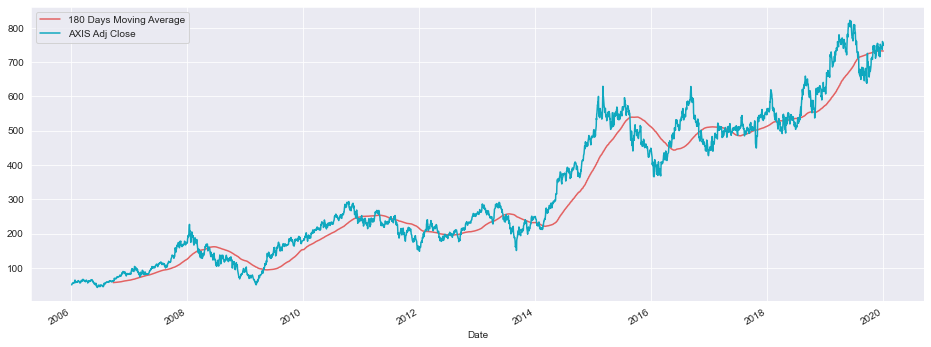

In [27]:
plt.figure(figsize=(16,6))
AXIS['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#e36262')
AXIS['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='AXIS Adj Close', color='#0fa8bf')
plt.legend()

### Bank of Baroda

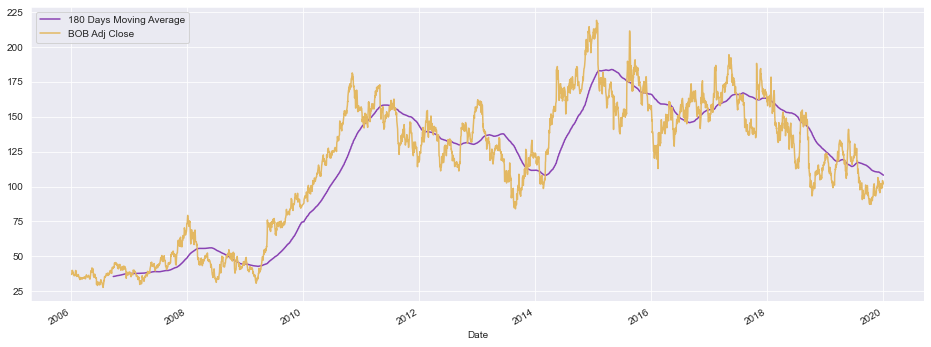

In [28]:
plt.figure(figsize=(16,6))
BOB['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#8942b3')
BOB['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='BOB Adj Close', color='#e3b862')
plt.legend(loc=2)

### HDFC Bank

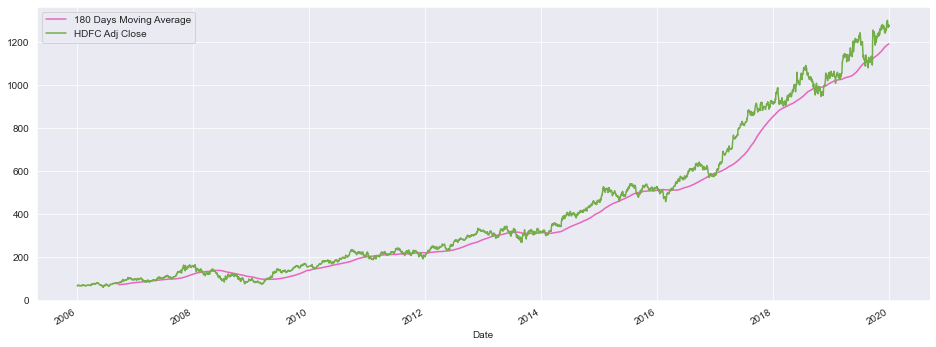

In [29]:
plt.figure(figsize=(16,6))
HDFC['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#e866bf')
HDFC['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='HDFC Adj Close', color='#74ad49')
plt.legend()

### ICICI Bank

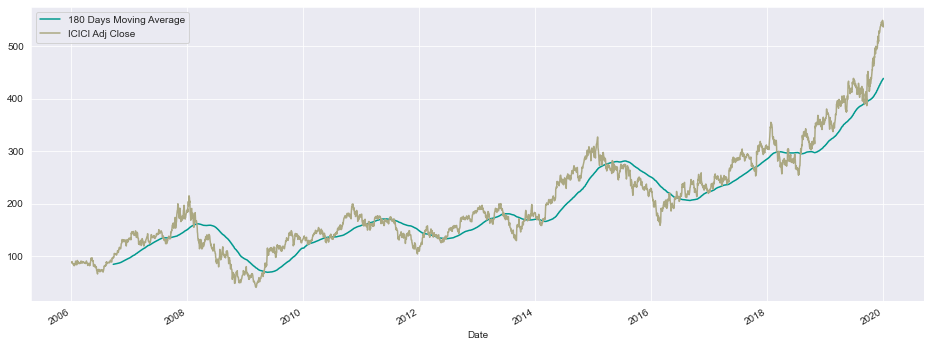

In [30]:
plt.figure(figsize=(16,6))
ICICI['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#00998e')
ICICI['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='ICICI Adj Close', color='#aba882')
plt.legend()

### Kotak Mahindra Bank

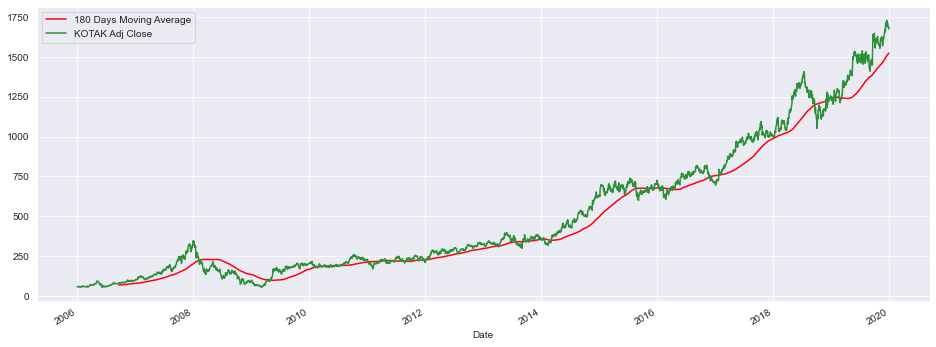

In [31]:
plt.figure(figsize=(16,6))
KOTAK['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#ff0015')
KOTAK['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='KOTAK Adj Close', color='#2d9139')
plt.legend()

### Punjab National Bank

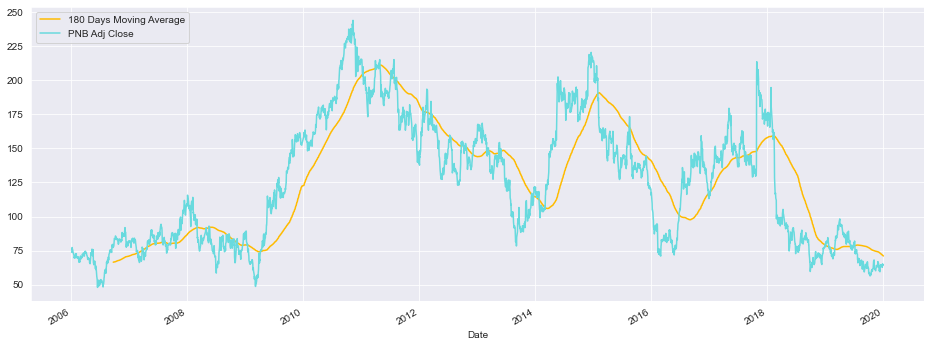

In [32]:
plt.figure(figsize=(16,6))
PNB['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#ffbb00')
PNB['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='PNB Adj Close', color='#68dade')
plt.legend(loc=2)

### State Bank of India

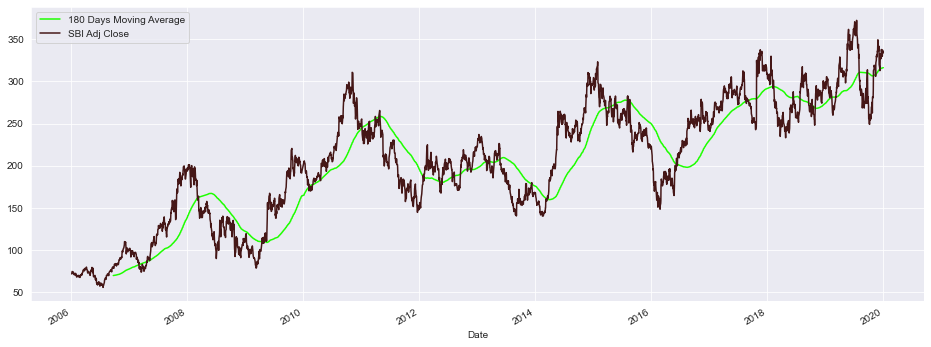

In [33]:
plt.figure(figsize=(16,6))
SBI['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#1eff00')
SBI['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='SBI Adj Close', color='#451717')
plt.legend()

### YES Bank

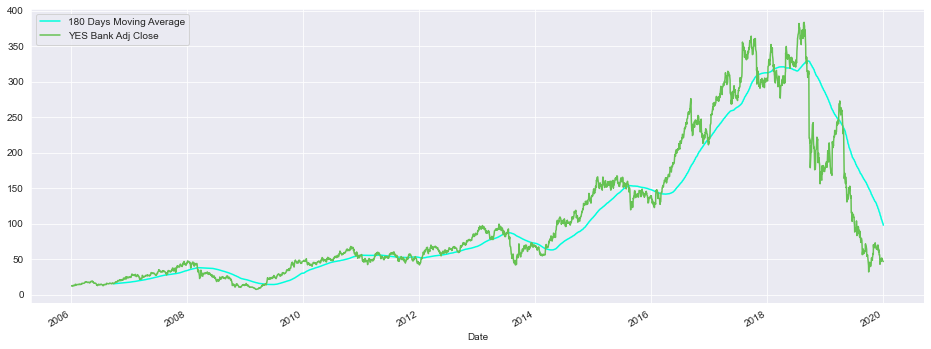

In [34]:
plt.figure(figsize=(16,6))
YESBANK['Adj Close'].loc['2006-01-01':'2020-01-01'].rolling(window=180).mean().plot(label='180 Days Moving Average', color='#00ffdd')
YESBANK['Adj Close'].loc['2006-01-01':'2020-01-01'].plot(label='YES Bank Adj Close', color='#66c253')
plt.legend()

# Heatmap

In [35]:
bank_cr = bank_stocks.xs(key='Adj Close', axis=1, level='Stock Info').corr()           # correlation
bank_cr

Bank Ticker,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,KOTAKBANK,PNB,SBI,YESBANK
Bank Ticker,,,,,,,,
AXISBANK,1.000000,0.507175,0.914355,0.911786,0.912157,-0.053044,0.866239,0.651512
BANKBARODA,0.507175,1.000000,0.242116,0.278407,0.211158,0.754058,0.729616,0.620904
HDFCBANK,0.914355,0.242116,1.000000,0.943104,0.993447,-0.302421,0.721601,0.545796
ICICIBANK,0.911786,0.278407,0.943104,1.000000,0.952437,-0.203549,0.773462,0.407696
KOTAKBANK,0.912157,0.211158,0.993447,0.952437,1.000000,-0.336652,0.706227,0.508437
PNB,-0.053044,0.754058,-0.302421,-0.203549,-0.336652,1.000000,0.365680,0.192892
SBI,0.866239,0.729616,0.721601,0.773462,0.706227,0.365680,1.000000,0.633445
YESBANK,0.651512,0.620904,0.545796,0.407696,0.508437,0.192892,0.633445,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

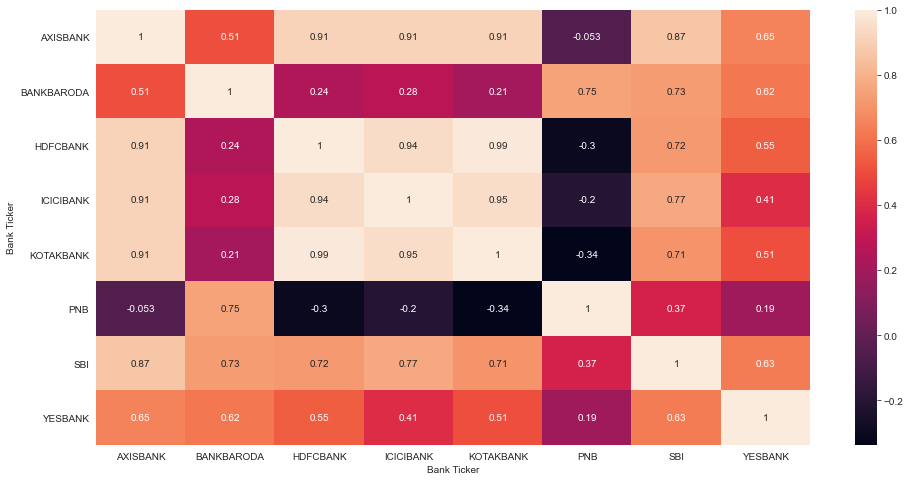

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap(bank_cr, annot=True)

# Clustermap

<Figure size 1152x576 with 0 Axes>

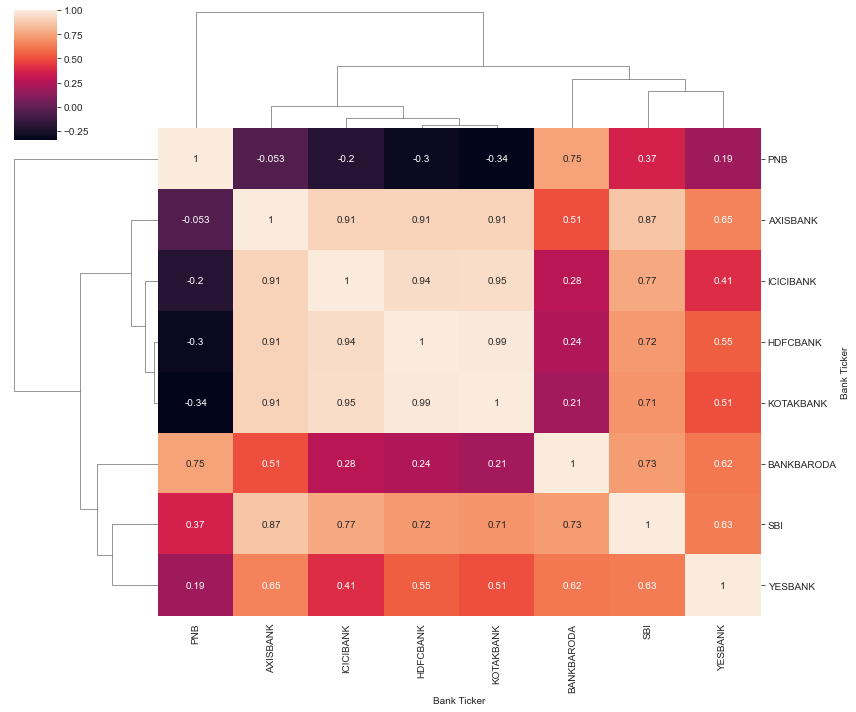

In [37]:
plt.figure(figsize=(16,8))
sns.clustermap(bank_cr, annot=True, figsize=(12,10))

# 💡Conclusions:
* **It has seen that 'March 2020' have the worst returns for most of the banks. Reason behind this is the [2020 Stock Market Crash also known as Coronavirus Crash](https://en.wikipedia.org/wiki/2020_stock_market_crash).**
* **It can also be observed that 'October 2008' also have the worst returns for some banks.
Reason behind this is the [2008 financial crisis](https://www.history.com/news/2008-financial-crisis-causes).**
* **Yes Bank stocks would be classified as to be the riskiest over the entire period. Although it shows good growth from the start of 2014 till the end on 2018, but then the stocks started to fall.**
* **Punjab National Bank and Bank of Baroda stocks started to fall from early 2018.**
* **Kotak Mahindra Bank stocks show the best growth over other banks.**